# Lecture 32: Single-Server Queueing Systems in Python

```{note}
This lecture details how to simulate a single-server queueing system developing the simulation logic along with its implemenation in Python
```

---

## Simulation Logic

1. **Procedure** $\text{SSQ}(n,A,S)$
2. <small>// SYSTEM STATUS</small>
3. $t \ \leftarrow 0$ &emsp;&emsp;<small>// simulation clock </small>
4. $\varphi \leftarrow 0$ &emsp;&emsp;<small>// server idle/busy </small>
5. $Q \leftarrow \varnothing$ &emsp;<small> // queue </small>
6. <small>// SYSTEM DYNAMICS</small>
7. $T_a \leftarrow \{\}$ &emsp;<small>// customer arrival time </small>
8. $T_s \leftarrow \{\}$ &emsp;<small>// customer service initiation time </small>
9. $T_d \leftarrow \{\}$ &emsp;<small>// customer departure time </small>
10. <small>// SYSTEM LOG</small>
11. $T_o \leftarrow \{\}$ &emsp;<small>// event time (arrival/service initiation/departure) </small>
12. $\Phi \leftarrow \{\}$ &emsp;<small> // server status at event time </small>
13. $J \leftarrow \{\}$ &emsp;<small> // queue length at event time </small>
14. <small>// INITIALIZATION</small>
15. $i \ \leftarrow 0$ &emsp;&emsp;<small>// index of last customer serviced </small>
16. $j  \ \leftarrow 0$ &emsp;<small>// queue length </small>
17. $k \leftarrow 0$ &emsp;&emsp;<small>// customers serviced </small>
18. $t_a \leftarrow A_i$ &emsp;&emsp;&emsp;&emsp;<small>// next arrival event time </small>
19. $t_d \leftarrow A_i + S_i$ &emsp;<small> // next departure event time </small>
20. **while** $k < n$ **do**
11. &emsp; **if** $t_a \leq t_d$ **then** &emsp;&emsp;&emsp;<small>// time jump to next customer arrival event</small>
22. &emsp;&emsp; $e \leftarrow 1$
23. &emsp;&emsp; $t \leftarrow t_a$
24. &emsp; **else** &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;<small>// time jump to next customer departure event</small>
25. &emsp;&emsp; $e \leftarrow -1$
26. &emsp;&emsp; $t \leftarrow t_d$
27. &emsp; **end if**
28. &emsp; **if** $e = 1$ **then** &emsp;&emsp;&emsp;&emsp;<small>// update system status for customer arrival </small>
29. &emsp;&emsp; $T_o \leftarrow T_o \cup \{t\}$
30. &emsp;&emsp; $T_a \leftarrow T_a \cup \{t\}$
31. &emsp;&emsp; **if** $\varphi = 0$ **then**
32. &emsp;&emsp;&emsp; $e \leftarrow 0$ 
33. &emsp;&emsp;&emsp; $i \leftarrow i + 1$ 
34. &emsp;&emsp; **else**
35. &emsp;&emsp;&emsp; $Q \leftarrow Q \cup \{i+j+1\}$
36. &emsp;&emsp;&emsp; $j \leftarrow j + 1$
37. &emsp;&emsp; **end if** 
38. &emsp;&emsp; $t_a \leftarrow (i+j+1 \leq n) \ ? \ t + A_{i+j+1} : \infty$
39. &emsp;&emsp; $\Phi \leftarrow \Phi \cup \{\varphi\}$
40. &emsp;&emsp; $J \leftarrow J \cup \{j\}$
41. &emsp; **else if** $e = -1$ **then** &emsp;<small>// update system status for customer departure </small>
42. &emsp;&emsp; $T_o \leftarrow T_o \cup \{t\}$
43. &emsp;&emsp; $T_d \leftarrow T_d \cup \{t\}$
44. &emsp;&emsp; **if** $j = 0$ **then**
45. &emsp;&emsp;&emsp; $\varphi \leftarrow 0$
46. &emsp;&emsp;&emsp; $t_d \leftarrow= \infty$
47. &emsp;&emsp; **else**
48. &emsp;&emsp;&emsp; $e \leftarrow 0$
49. &emsp;&emsp;&emsp; $i \leftarrow \text{pop}(Q)$
50. &emsp;&emsp;&emsp; $j \leftarrow j - 1$
51. &emsp;&emsp; **end if** 
52. &emsp;&emsp; $\Phi \leftarrow \Phi \cup \{\varphi\}$
53. &emsp;&emsp; $J \leftarrow J \cup \{j\}$
54. &emsp;&emsp; $k \leftarrow k + 1$
55. &emsp; **end if**
56. &emsp; **if** $e = 0$ **then** &emsp;&emsp;&emsp;&emsp;<small>// update system status for customer service intiation </small>
57. &emsp;&emsp; $T_o \leftarrow T_o \cup \{t\}$
58. &emsp;&emsp; $T_s \leftarrow T_s \cup \{t\}$
59. &emsp;&emsp; $\varphi \leftarrow 1$
60. &emsp;&emsp; $t_d \leftarrow t + S_i$
61. &emsp;&emsp; $\Phi \leftarrow \Phi \cup \{\varphi\}$
62. &emsp;&emsp; $J \leftarrow J \cup \{j\}$
63. &emsp; **end if**
64. **end while**
65. $d \leftarrow \sum_{i=1}^{n}(T_{s_i} - T_{a_i}) / n$ &emsp;<small>// average delay</small>
66. $q \leftarrow $ &emsp;<small>// average queue length</small>
67. $u \leftarrow \Phi \cdot T_o / t$ &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;<small> // average utilization</small>
68. **return** d, q, u

## Implementation

In [17]:
def ssq(n, A, S, silent=False):
    """
    This function simulates a single-server queueing system for n customers given their inter-arrival times - A, and service times - S

    Parameters
    ---
    n: int
        number of customers
    A: list[float]
        customer inter-arrival times
    S: list[float]
        customer service times
    silent=False: bool
        run in silence if True else display system
    
    Returns
    ---
    d: float
        average delay
    q: float
        average queue length
    u: float
        average utilization
    """
    # System Status
    t  = 0              # simulation clock
    z  = 0              # server status
    Q  = []             # queue
    # System Dynamics
    Ta = []             # customer arrival time
    Ts = []             # customer service initiation time
    Td = []             # customer depature time
    # System Log
    To = [0]            # event time (customer arrival/service initiation/departure time)
    Z  = [0]            # server status at event time
    J  = [0]            # queue length at event time
    # Initialization
    i  = -1             # index of last customer serviced
    j  = 0              # queue length
    k  = 0              # customers serviced
    ta = A[0]           # next arrival event time
    td = A[0] + S[0]    # next departure event time
    # Loop
    while k < n:
        if ta <= td:    # time jump to next customer arrival event
            e = 1
            t = ta
        else:           # time jump to next customer departure event
            e = -1
            t = td
        if e == 1:      # update system status for customer arrival
            To.append(t)
            Ta.append(t)
            if z == 0:
                e = 0
                i = i + 1
            else:
                Q.append(i+j+1)
                j = j + 1
            ta = round(ta + A[i+j+1], 1) if i+j+1 < len(A) else float('inf')
            Z.append(z)
            J.append(j)
            if not silent: print("Arrival      :     ", " ", "X", i , Q)
        elif e == -1:   # update system status for customer departure
            if not silent: print("Departure    :   ", i, "X", " ", Q)
            To.append(t)
            Td.append(t)
            if j == 0:
                z  = 0
                td = float('inf')
            else:
                e  = 0
                i  = Q.pop(0) 
                j  = j - 1
            Z.append(z)
            J.append(j)
            k = k + 1
        if e == 0:      # update system status for customer service initiation
            To.append(t)
            Ts.append(t)
            z  = 1
            td = t + S[i]
            Z.append(z)
            J.append(j)
            if not silent: print("Service      :     ", " ", "X", i, Q)
    T = [To[i]-To[i-1] for i in range(1,len(To))] + [0.0]
    d = round(sum([Ts[i] - Ta[i] for i in range(n)]) / n, 3)        # average delay
    q = round(sum([J[i] * T[i] for i in range(len(T))]) / t, 3)     # average queue length
    u = round(sum([Z[i] * T[i] for i in range(len(T))]) / t, 3)     # average utilization
    return d, q, u


In [19]:
# Single Simulation Outcomes
n = 6
A = [0.4, 1.2, 0.5, 1.7, 0.2, 1.6, 0.2, 1.4, 1.9]
S = [2.0, 0.7, 0.2, 1.1, 3.7, 0.6, 1.0, 1.0, 1.0]
ssq(n, A, S)

Arrival      :        X 0 []
Service      :        X 0 []
Arrival      :        X 0 [1]
Arrival      :        X 0 [1, 2]
Departure    :    0 X   [1, 2]
Service      :        X 1 [2]
Departure    :    1 X   [2]
Service      :        X 2 []
Departure    :    2 X   []
Arrival      :        X 3 []
Service      :        X 3 []
Arrival      :        X 3 [4]
Departure    :    3 X   [4]
Service      :        X 4 []
Arrival      :        X 4 [5]
Arrival      :        X 4 [5, 6]
Arrival      :        X 4 [5, 6, 7]
Departure    :    4 X   [5, 6, 7]
Service      :        X 5 [6, 7]
Arrival      :        X 5 [6, 7, 8]
Departure    :    5 X   [6, 7, 8]
Service      :        X 6 [7, 8]


(0.95, 1.217, 0.902)


Summary Statistics (1000 runs, n=100)

     mean  median   range      sd     iqr  skewness  kurtosis
d  4.0092  3.6670  17.552  1.6074  1.4693    3.6866   25.0216
q  3.2290  2.9295  15.411  1.3720  1.2185    3.8767   27.4364
u  0.7985  0.7980   0.252  0.0352  0.0470    0.1558    0.2841

Note: kurtosis is excess kurtosis.



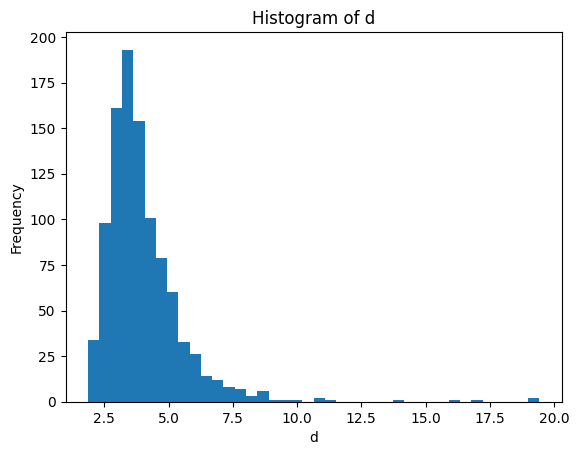

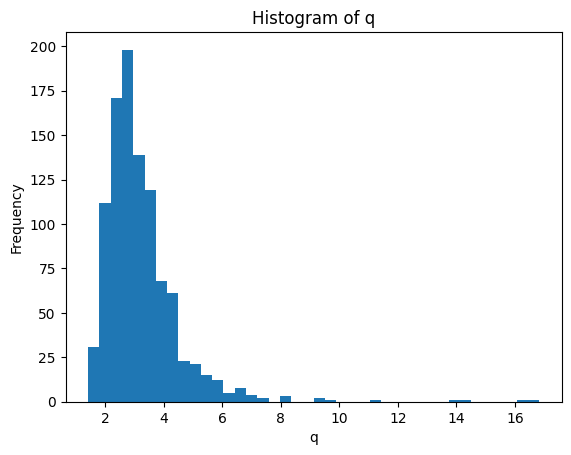

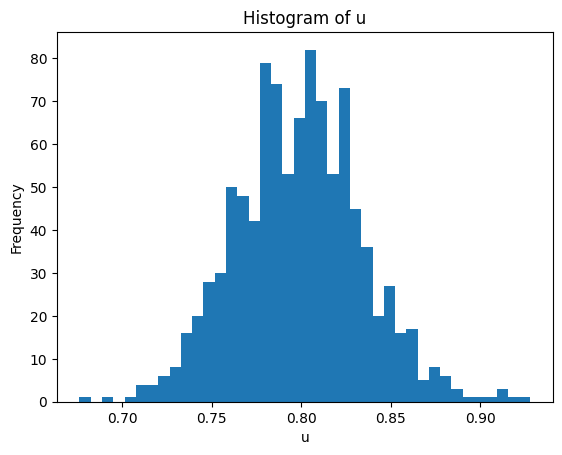

In [18]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def simulate(sims=1000, n=100, lam=0.8, mu=1.0):
    """
    Run Monte Carlo simulation of SSQ using exponential inter-arrivals and service times.
    
    Parameters
    ----------
    sims : int
        number of simulations (default=1000)
    n : int
        number of customers per run (default=100)
    lam : float
        arrival rate λ
    mu : float
        service rate μ
    
    Returns
    -------
    df : pandas.DataFrame
        Results with columns ['d','q','u']
    """
    # Random simulations
    results = []
    for k in range(sims):
        rng = random.Random(k)
        # Generate n+5 to avoid indexing issues in ssq
        A = [rng.expovariate(lam) for _ in range(n+5)]
        S = [rng.expovariate(mu) for _ in range(n+5)]
        d, q, u = ssq(n, A, S, silent=True)
        results.append((d, q, u))
    return pd.DataFrame(results, columns=["d","q","u"])

# Descriptive statistics
def describe_series(x: pd.Series):
    arr = np.asarray(x, dtype=float)
    mean = float(np.mean(arr))
    median = float(np.median(arr))
    rng = float(np.max(arr) - np.min(arr))
    sd = float(np.std(arr, ddof=1))
    iqr = np.percentile(arr, 75) - np.percentile(arr, 25)
    skew = np.mean((arr - mean)**3) / (sd**3) if sd > 0 else np.nan
    kurt = np.mean((arr - mean)**4) / (sd**4) - 3 if sd > 0 else np.nan
    return {
        "mean": mean, "median": median, "range": rng,
        "sd": sd, "iqr": iqr, "skewness": skew, "kurtosis": kurt
    }

def summarize_df(df: pd.DataFrame):
    return pd.DataFrame({col: describe_series(df[col]) for col in df.columns}).T

# Run and visualize
if __name__ == "__main__":
    df = simulate(sims=1000, n=1000, lam=0.8, mu=1.0)
    summary = summarize_df(df).round(4)
    print("\nSummary Statistics (1000 runs, n=100)\n")
    print(summary.to_string())
    print("\nNote: kurtosis is excess kurtosis.\n")
    
    # Histograms
    for metric in ["d","q","u"]:
        plt.figure()
        plt.hist(df[metric], bins=40)
        plt.title(f"Histogram of {metric}")
        plt.xlabel(metric)
        plt.ylabel("Frequency")
        plt.show()